In [133]:
from datetime import datetime
print("last update : ", datetime.today().strftime("%Y-%m-%d %H:%M"))

last update :  2021-06-27 23:33


# Seaborn
### <U>dataset1. tips</U>
### load_dataset 

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
tips # size : 식사 인원

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### 수업 복습
### lmplot : 산점도 + 회귀직선

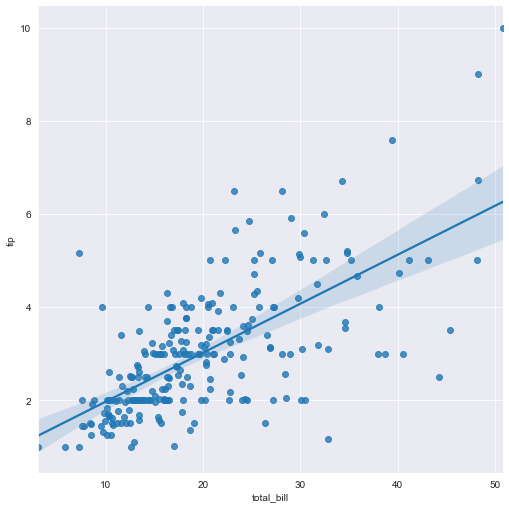

In [8]:
sns.set_style("darkgrid") # whitegrid
sns.lmplot(x='total_bill',y='tip',data=tips, height=7) # height = size = figsize


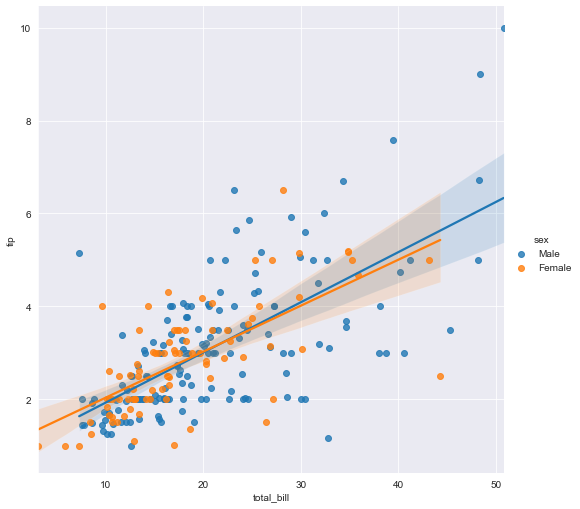

In [12]:
sns.set_style("darkgrid")
# sns.lmplot(x='total_bill',y='tip',hue='smoker', data=tips, height=7)
sns.lmplot(x='total_bill',y='tip',hue='sex', data=tips, height=7)


#### 추가 공부
### relplot : only 산점도, 데이터의 값이 모두 numeric일 때
style 인수를 통해 모양을 다르게 해줄 수도 있고, size 인수를 통해 크기를 다르게 해줄 수도 있다.

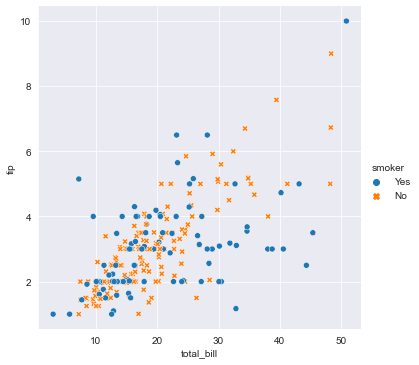

In [18]:
# 인자 3개 = total_bill, tip, smoker/sex
# sns.relplot(x='total_bill',y='tip', hue='smoker', data=tips)
# sns.relplot(x='total_bill',y='tip', hue='sex', data=tips)

# 인자 3개 = total_bill, tip, smoker
sns.relplot(x='total_bill',y='tip', hue='smoker', style='smoker', data=tips)


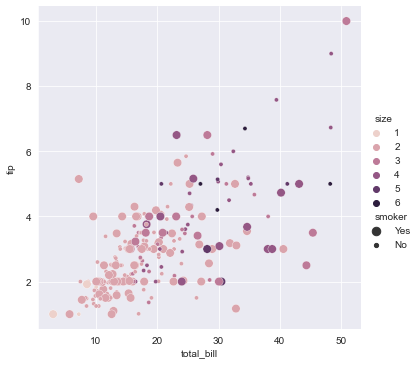

In [20]:
# 인자 4개 = total_bill, tip, size(색으로 구별-hue 인자), smoker(사이즈로 구별-size 인자)
sns.relplot(x='total_bill',y='tip', hue='size', size='smoker', data=tips)


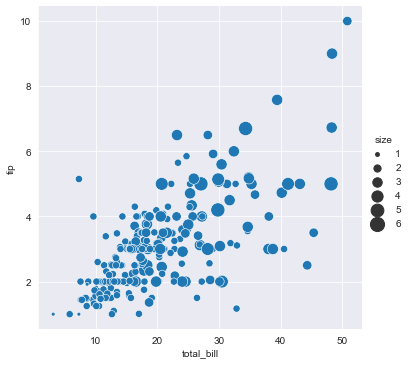

In [23]:
sns.relplot(x='total_bill',y='tip', size='size', sizes=(15,200), data=tips)


### catplot : 데이터 값이 카테고리화 되어 있을 때

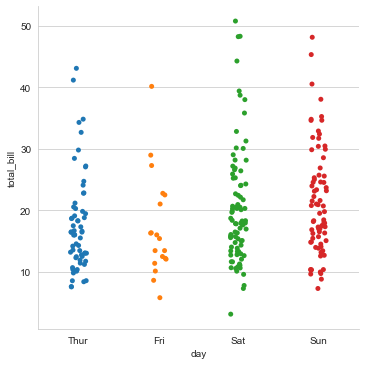

In [26]:
sns.set_style("whitegrid")
sns.catplot(x='day', y='total_bill',data=tips)

#### 데이터 출력 분포 방식을 조절하는 인자/속성

| agrument | attribute |
|--|--|
|jitter |False, True|
|kind|“strip”(default), “swarm”, “box”, “violin”, “boxen”, “point”, “bar”,  “count”|


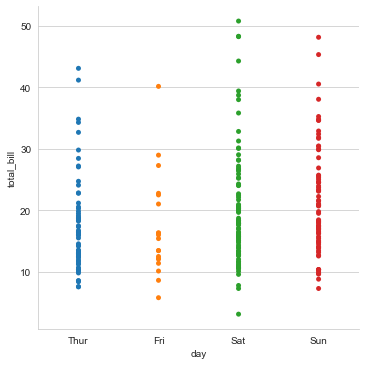

In [27]:
sns.catplot(x='day', y='total_bill',jitter=False, data=tips)

__catplot = figure-level function, 그림 전체를 반환하는 함수__   
__<-> axes-level function : axes에 그림을 그리는 함수__  
subplot으로 1) catplot(kind="violin"), 2) violinplot()을 그려서
두 plot이 동일한지 비교해보고 싶었다. 그런데 __오류 발생!__  

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)


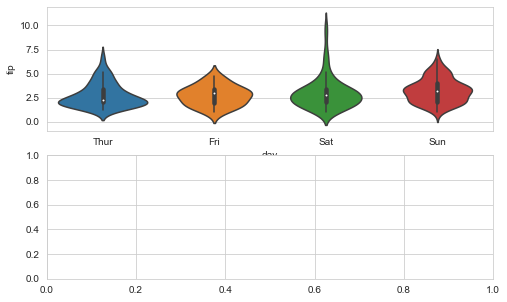

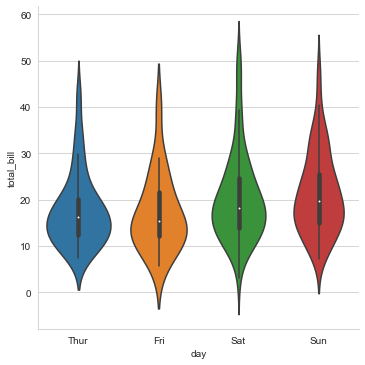

In [112]:
fig, axes = plt.subplots(2,1, figsize=(8,5))
sns.violinplot(ax=axes[0], x='day',y='tip', data=tips)
sns.catplot(ax=axes[1], x='day', y='total_bill', label='catplot',kind='violin', data=tips)

# warning : catplot이 figure-level function 이라서 axes를 사용할 수 없다..?!

catplot은 plt을 쓰지 않아도 자기 스스로 전체 그림을 만든다.   
따라서 axes가 필요한 axes-level function인 violinplot이랑 catplot은 같이 사용할 수 없다.   
차라리 violin plot을 두 개 그리거나, catplot 2개 그려야한다.  
그래서 catplot은 ax란 인자가 없는 것 같다. catplot이 가지고 있는 kind 속성을 axes가 필요한 그래프로 그리려면 대체가능한 함수들이 있다. 아래는 목록 ↓ [링크](https://seaborn.pydata.org/generated/seaborn.catplot.html) [링크](https://jehyunlee.github.io/2020/10/06/Python-DS-36-seaborn_matplotlib3/)  

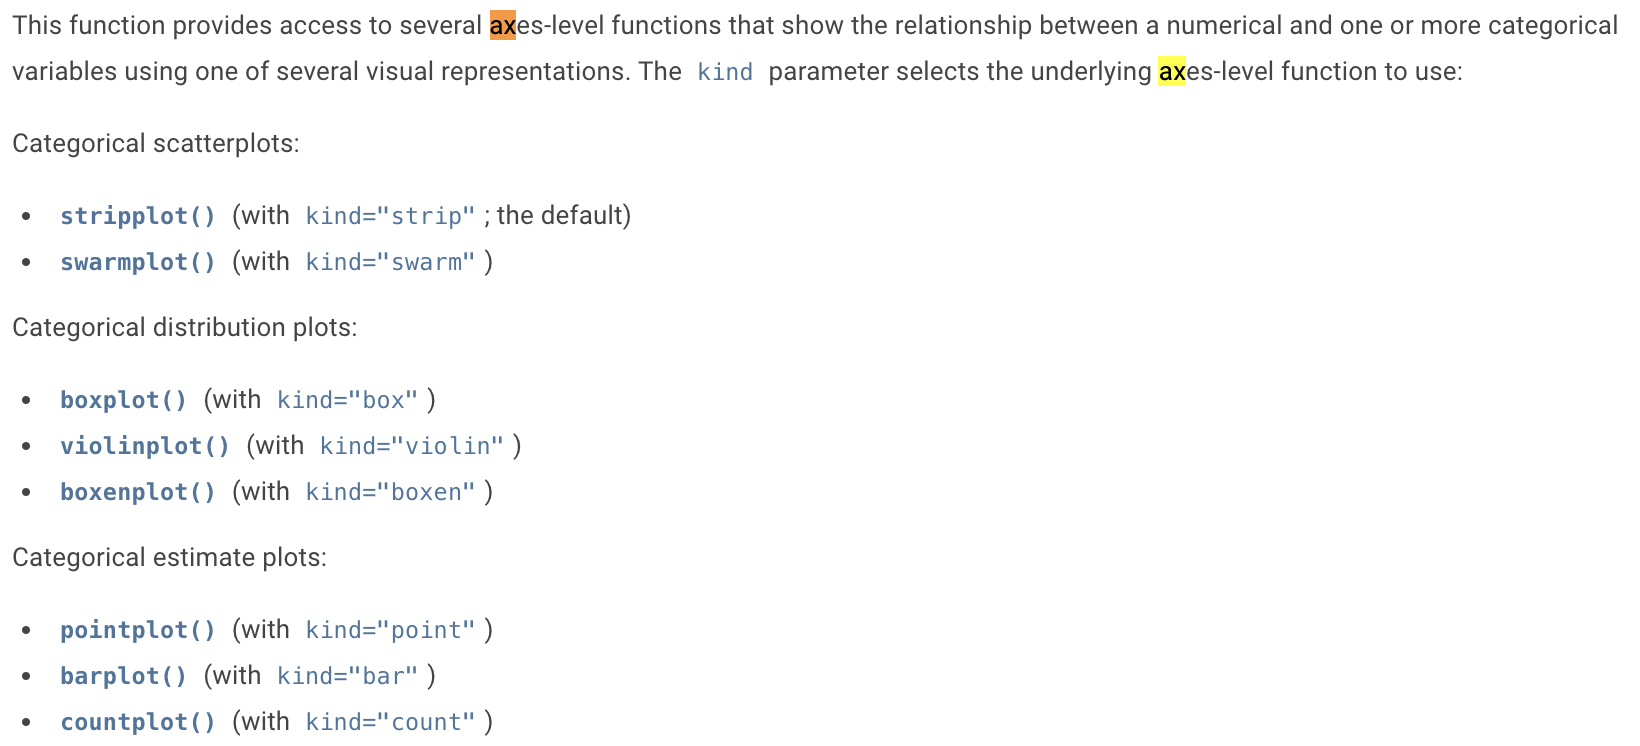

<AxesSubplot:xlabel='day', ylabel='tip'>

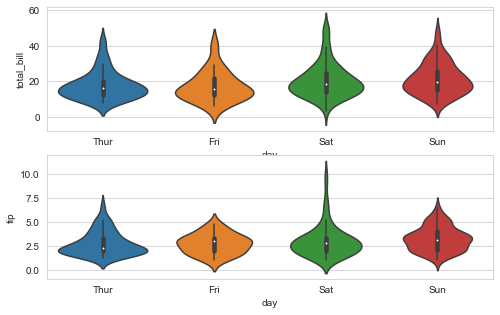

In [99]:
# 대체 1. violinplot 2번쓰기
fig, axes = plt.subplots(2,1, figsize=(8,5))
sns.violinplot(ax=axes[0], x='day',y='total_bill', data=tips)
sns.violinplot(ax=axes[1], x='day',y='tip', data=tips)
# catplot 이 subplot을 하지 못하게 하는 원인이다!

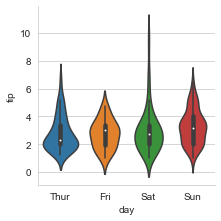

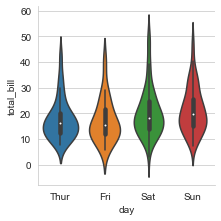

In [116]:
sns.catplot(x='day',y='tip', kind='violin', data=tips, height=3)
sns.catplot(x='day', y='total_bill', label='catplot',kind='violin', data=tips, height=3)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)


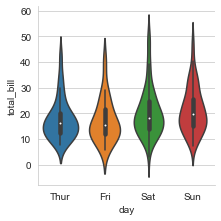

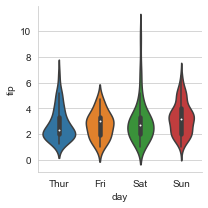

In [120]:
# plt close를 쓰든 안쓰든 결과는 동일하다.
fig = plt.figure()

ax1 = fig.add_subplot(121)
g = sns.catplot(x='day',y='total_bill',kind='violin',data=tips,ax=ax1, height=3)

ax2 = fig.add_subplot(122)
g = sns.catplot(x='day',y='tip',kind='violin',data=tips,ax=ax2, height=3)

plt.close(0)
plt.close(1)
plt.tight_layout()

[링크](https://stackoverflow.com/questions/56788245/is-there-a-restriction-on-catplot-with-subplot)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


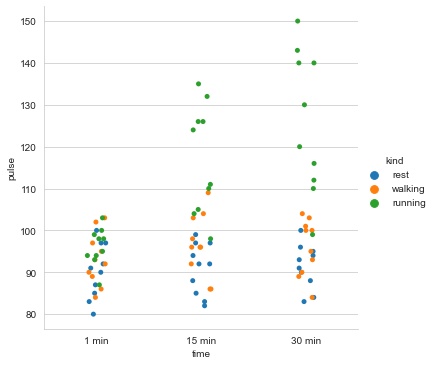

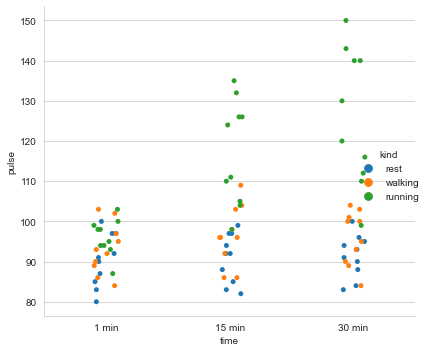

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

exercise = sns.load_dataset("exercise")

fig = plt.figure()

ax1 = fig.add_subplot(121)
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, ax=ax1) # pass ax1

ax2 = fig.add_subplot(122)
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, ax=ax2) # pass ax2

plt.close(0)
plt.close(1)
plt.tight_layout()

### <U>dataset 2. flights</U>
#### 수업 복습

### DataFrame.info( ) / DataFrame.describe( )

In [127]:
fg = sns.load_dataset("flights")
# fg
fg.info() # 행과 열, 컬럼명, 자료형
# fg.describe() # 요약통계량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### pivot 
- 테이블화

In [125]:
fgpivot = fg.pivot("year","month","passengers")
fgpivot

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [128]:
fgpivot = fg.pivot("month","year","passengers")
fgpivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


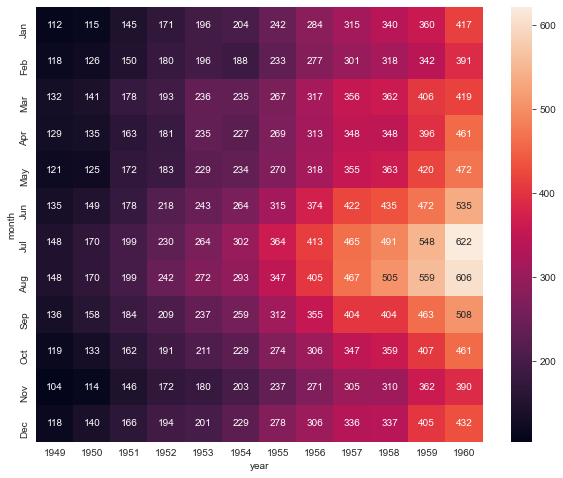

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(fgpivot, annot=True, fmt="d") # annot:데이터값 주석처리, fmt:주석처리 formatting 
plt.show()